In [20]:
import pandas as pd
import re
import zipfile,os
from matplotlib.image import imread
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from google.colab import files
%matplotlib inline

!pip install split-folders
import splitfolders

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [3]:
splitfolders.ratio('/content/drive/MyDrive/Fish_Datasets', output="/content/", seed=1337, ratio=(.8, .2),group_prefix=None) 

Copying files: 4000 files [14:33,  4.58 files/s]


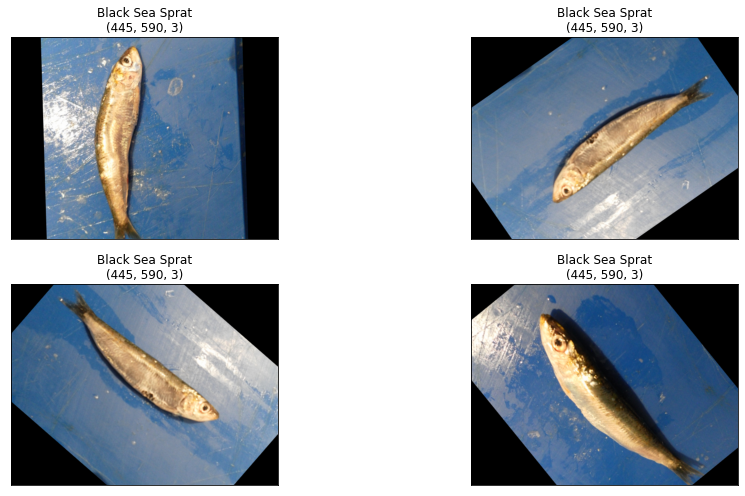

In [2]:
dir = '/content/train'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = dir+'/Black Sea Sprat/'+ os.listdir(dir+'/Black Sea Sprat/')[i]
    img = plt.imread(img)
    ax.imshow(img)
    ax.set_title(f'Black Sea Sprat\n{img.shape}')
plt.tight_layout()
plt.show()


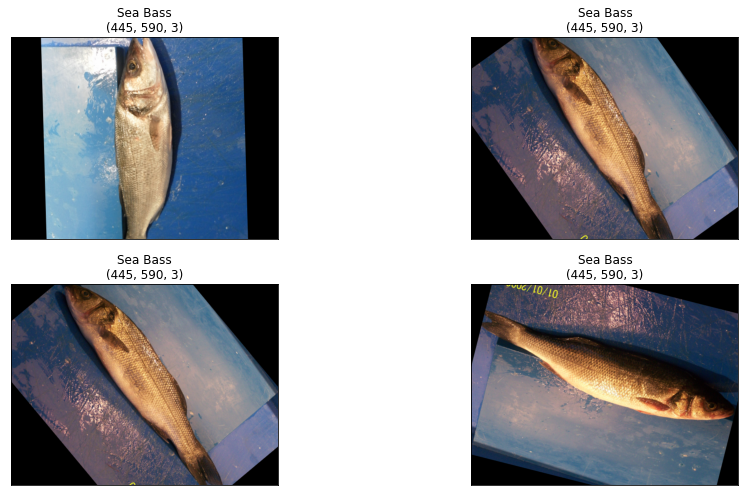

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = dir+'/Sea Bass/'+ os.listdir(dir+'/Sea Bass/')[i]
    img = plt.imread(img)
    ax.imshow(img)
    ax.set_title(f'Sea Bass\n{img.shape}')
plt.tight_layout()
plt.show()

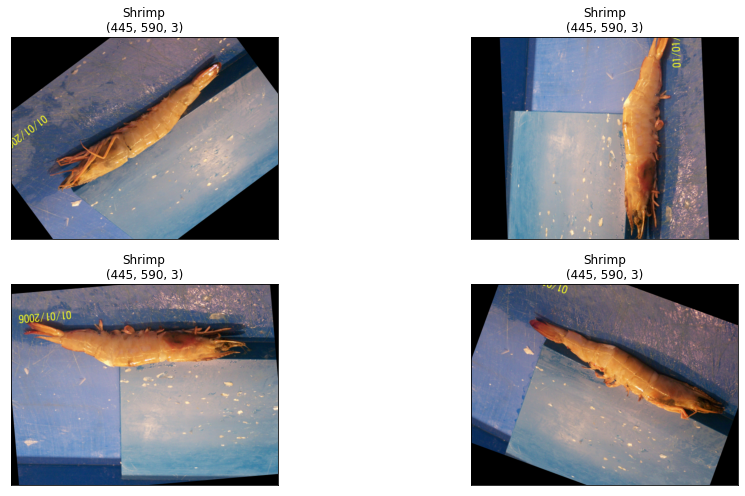

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = dir+'/Shrimp/'+ os.listdir(dir+'/Shrimp/')[i]
    img = plt.imread(img)
    ax.imshow(img)
    ax.set_title(f'Shrimp\n{img.shape}')
plt.tight_layout()
plt.show()

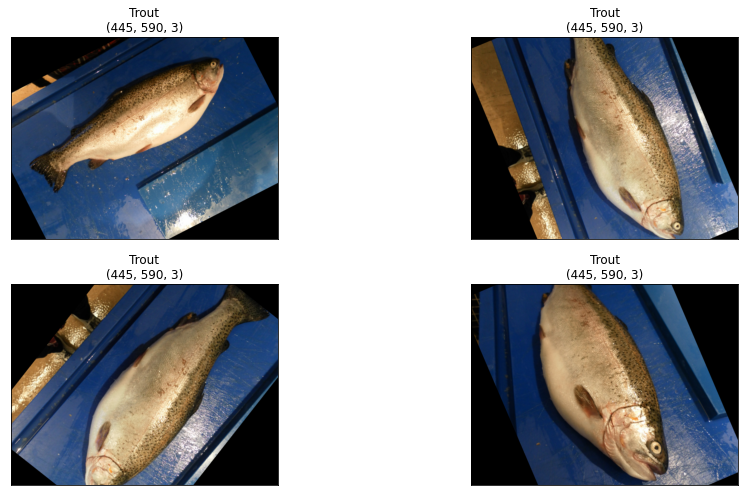

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = dir+'/Trout/'+ os.listdir(dir+'/Trout/')[i]
    img = plt.imread(img)
    ax.imshow(img)
    ax.set_title(f'Trout\n{img.shape}')
plt.tight_layout()
plt.show()

In [6]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.10, 
        height_shift_range=0.10,
        rescale=1./255,
        shear_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
image_size = (150,200)
img_shape = (150,200,3)

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=img_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation= 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 110592)            0

In [10]:
train_dir = '/content/train'
val_dir = '/content/val'

train_image_gen = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_size,
                                               color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical')
val_image_gen = test_datagen.flow_from_directory(val_dir,
                                               target_size=image_size,
                                               color_mode='rgb',
                                               batch_size=8,
                                               class_mode='categorical')

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [11]:
train_image_gen.class_indices

{'Black Sea Sprat': 0, 'Sea Bass': 1, 'Shrimp': 2, 'Trout': 3}

In [12]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
100/100 [==============================] - 208s 2s/step - loss: 1.6904 - accuracy: 0.3869 - val_loss: 1.0245 - val_accuracy: 0.6087
Epoch 2/20
100/100 [==============================] - 206s 2s/step - loss: 0.8447 - accuracy: 0.6413 - val_loss: 0.7059 - val_accuracy: 0.7150
Epoch 3/20
100/100 [==============================] - 209s 2s/step - loss: 0.6751 - accuracy: 0.7228 - val_loss: 0.7008 - val_accuracy: 0.7050
Epoch 4/20
100/100 [==============================] - 206s 2s/step - loss: 0.5155 - accuracy: 0.7978 - val_loss: 0.5155 - val_accuracy: 0.7513
Epoch 5/20
100/100 [==============================] - 206s 2s/step - loss: 0.4541 - accuracy: 0.8181 - val_loss: 0.4815 - val_accuracy: 0.7788
Epoch 6/20
100/100 [==============================] - 211s 2s/step - loss: 0.3513 - accuracy: 0.8672 - val_loss: 0.4185 - val_accuracy: 0.7937
Epoch 7/20
100/100 [==============================] - 207s 2s/step - loss: 0.3424 - accuracy: 0.8719 - val_loss: 0.2178 - val_accuracy: 0.9212

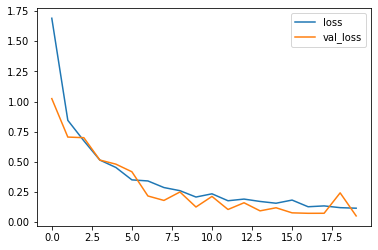

In [13]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

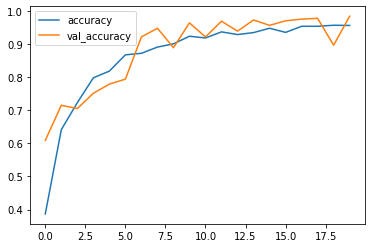

In [14]:
losses[['accuracy','val_accuracy']].plot()

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpl55g1y5b/assets
